<a href="https://colab.research.google.com/github/fahmi143/apd-core/blob/master/KarstGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import imageio as iio
from PIL import Image
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D


In [ ]:
def upload_data():
  from google.colab import files
  upload=files.upload()
  return

upload_data()


In [ ]:
upload_data()

Saving 1.JPG to 1 (1).JPG
Saving 2.JPG to 2.JPG
Saving 3.JPG to 3 (1).JPG
Saving 4.JPG to 4 (1).JPG
Saving 5.JPG to 5.JPG
Saving 6.JPG to 6 (1).JPG
Saving 7.JPG to 7 (1).JPG
Saving 8.JPG to 8.JPG
Saving 9.JPG to 9.JPG
Saving 10.JPG to 10.JPG
Saving 11.JPG to 11.JPG
Saving 12.JPG to 12.JPG
Saving 13.JPG to 13.JPG
Saving 14.JPG to 14.JPG


In [ ]:
upload_data()

Saving 1.JPG to 1 (2).JPG
Saving 2.JPG to 2 (1).JPG
Saving 3.JPG to 3 (2).JPG
Saving 4.JPG to 4 (2).JPG
Saving 5.JPG to 5 (1).JPG


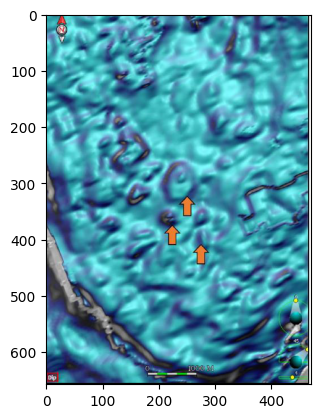

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('1.JPG'))

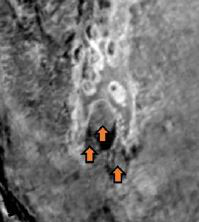

In [ ]:
from PIL import Image
img_array=Image.open("12.JPG")
img_array.show()
basewidth = 300
img = Image.open("12.JPG")


In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
#Data Augmentation
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:

train_dataset=train.flow_from_directory('/content/drive/MyDrive/KarstImages/TRAIN',target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=train.flow_from_directory('/content/drive/MyDrive/KarstImages/VALIDATION',target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
test_dataset=train.flow_from_directory('/content/drive/MyDrive/KarstImages/TEST',target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')



Found 14 images belonging to 2 classes.
Found 5 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [ ]:
#Model

model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                 #
                                tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                #
                            tf.keras.layers.Flatten(),
                                  ##
                            tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                            tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])

In [ ]:
model.compile(loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy'])

In [ ]:
model_fit= model.fit(train_dataset,
                     steps_per_epoch=3,
                    epochs=30,
                    validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 0s 159ms/step - loss: 5.4027e-05 - accuracy: 1.0000 - val_loss: 2.8078 - val_accuracy: 0.2000
Epoch 2/30
3/3 [==============================] - 0s 94ms/step - loss: 1.0455e-05 - accuracy: 1.0000 - val_loss: 3.1753 - val_accuracy: 0.2000
Epoch 3/30
3/3 [==============================] - 0s 88ms/step - loss: 3.5369e-06 - accuracy: 1.0000 - val_loss: 3.0854 - val_accuracy: 0.2000
Epoch 4/30
3/3 [==============================] - 0s 65ms/step - loss: 1.2258e-05 - accuracy: 1.0000 - val_loss: 2.7487 - val_accuracy: 0.2000
Epoch 5/30
3/3 [==============================] - 0s 57ms/step - loss: 1.5232e-05 - accuracy: 1.0000 - val_loss: 3.2907 - val_accuracy: 0.2000
Epoch 6/30
3/3 [==============================] - 0s 55ms/step - loss: 1.4221e-06 - accuracy: 1.0000 - val_loss: 3.3537 - val_accuracy: 0.2000
Epoch 7/30
3/3 [==============================] - 0s 62ms/step - loss: 1.1278e-05 - accuracy: 1.0000 - val_loss: 2.0628 - val_accuracy: 0.200

In [ ]:
score = model.evaluate(validation_data_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



ValueError: ignored

In [ ]:
import numpy as np
import keras.utils as image
from keras.utils import load_img
test_image = image.load_img('/content/drive/MyDrive/KarstImages/TEST/7.JPG', target_size=(200,200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
res = model.predict(test_image)
print(train_dataset.class_indices)
if res[0][0] == 1:
        pred = "Sinkhole"
else:
        pred = "Dendritic"
print(pred)

1/1 [==============================] - 0s 28ms/step
{'Dendritic': 0, 'Sinkhole': 1}
Dendritic
